In [1]:
%matplotlib inline
import pandas as pd
titanic_filename = "Titanic-1.csv"
titanic = pd.read_csv(titanic_filename, index_col=0)
titanic.head()

PClass    Age     Sex  Survived
PassengerID                                
1              1st  29.00  female         1
2              1st   2.00  female         0
3              1st  30.00    male         0
4              1st  25.00  female         0
5              1st   0.92    male         1

In [2]:
type(titanic)

pandas.core.frame.DataFrame

In [3]:
titanic['Age'][4]

25.0

In [4]:
titanic.loc[4, 'Age']

25.0

In [5]:
titanic.iloc[3, 1]

25.0

In [6]:
mask_survived = titanic['Survived'] == 1
mask_survived

PassengerID
1        True
2       False
3       False
4       False
5        True
        ...  
1309    False
1310    False
1311    False
1312    False
1313    False
Name: Survived, Length: 1313, dtype: bool

In [7]:
titanic.loc[mask_survived, 'Age']

PassengerID
1       29.00
5        0.92
6       47.00
7       63.00
9       58.00
        ...  
1280    22.00
1290      NaN
1294    45.00
1303      NaN
1305    15.00
Name: Age, Length: 450, dtype: float64

In [8]:
mask_age = (titanic['Age'] > 25) & (titanic['Age'] < 30)
titanic[mask_age]

PClass   Age     Sex  Survived
PassengerID                               
1              1st  29.0  female         1
21             1st  26.0    male         1
25             1st  28.0    male         1
58             1st  27.0    male         1
64             1st  27.0    male         0
...            ...   ...     ...       ...
1300           3rd  27.0    male         0
1304           3rd  27.0    male         0
1309           3rd  27.0    male         0
1310           3rd  26.0    male         0
1313           3rd  29.0    male         0

[90 rows x 4 columns]

In [9]:
titanic.groupby(['Survived']).mean()

Age
Survived           
0         31.131670
1         29.359585

In [10]:
titanic.sort_values(['Age'], ascending=True)

PClass   Age     Sex  Survived
PassengerID                               
764            3rd  0.17  female         1
752            3rd  0.33    male         0
545            2nd  0.80    male         1
617            3rd  0.83    male         1
359            2nd  0.83    male         1
...            ...   ...     ...       ...
1301           3rd   NaN    male         0
1303           3rd   NaN    male         1
1306           3rd   NaN    male         0
1307           3rd   NaN  female         0
1308           3rd   NaN  female         0

[1313 rows x 4 columns]

In [11]:
titanic.describe()

Age     Survived
count  756.000000  1313.000000
mean    30.397989     0.342727
std     14.259049     0.474802
min      0.170000     0.000000
25%     21.000000     0.000000
50%     28.000000     0.000000
75%     39.000000     1.000000
max     71.000000     1.000000

<AxesSubplot:ylabel='Sex'>

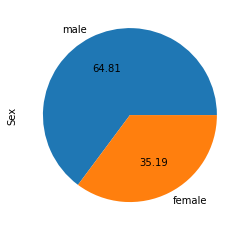

In [12]:
titanic['Sex'].value_counts().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='PClass'>

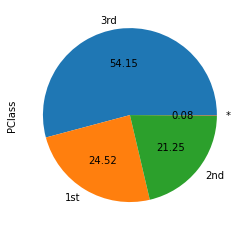

In [13]:
titanic['PClass'].value_counts().plot(kind='pie', autopct='%.2f')

<AxesSubplot:ylabel='PClass'>

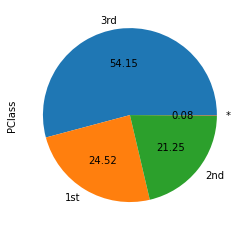

In [14]:
titanic.PClass.value_counts().plot.pie(autopct='%.2f')

Text(0.5, 0, 'Age')

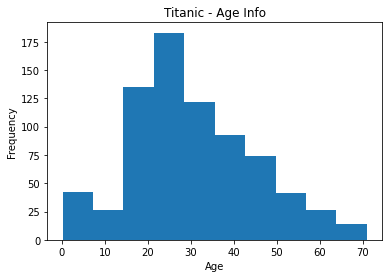

In [15]:
import matplotlib.pyplot as plt

titanic.Age.plot.hist(bins=10)
plt.title("Titanic - Age Info")
plt.xlabel('Age')

Text(0.5, 0, 'Age')

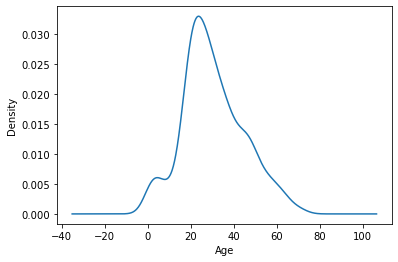

In [16]:
titanic.Age.plot.density()
plt.xlabel('Age')

<AxesSubplot:>

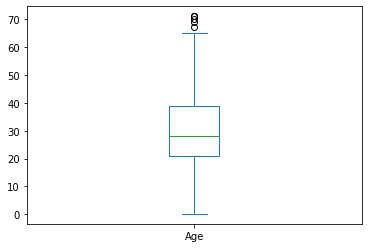

In [17]:
titanic.Age.plot.box()

<AxesSubplot:title={'center':'Age'}, xlabel='Survived'>

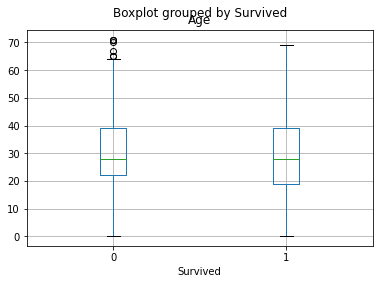

In [18]:
titanic.dropna().boxplot(column='Age', by='Survived')

<AxesSubplot:title={'center':'Age'}, xlabel='Sex'>

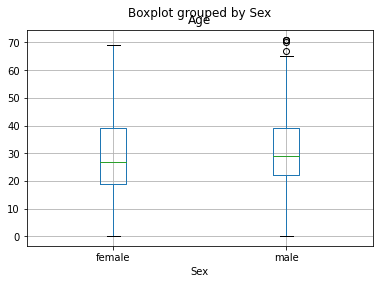

In [19]:
titanic.dropna().boxplot(column='Age', by='Sex')

### Titanic Survival Rates by Sex

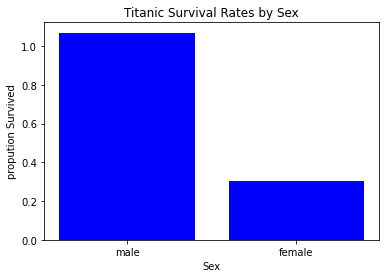

In [29]:
sex_count = titanic.dropna().Sex.value_counts()

mask_sex_f = titanic['Sex'] == 'female'
mask_sex_m = titanic['Sex'] == 'male'

f_survaval = titanic.loc[mask_sex_f, 'Survived'].value_counts()[1]
m_survaval = titanic.loc[mask_sex_m, 'Survived'].value_counts()[1]

rate = [f_survaval / float(sex_count['female']),
        m_survaval / float(sex_count['male'])]
plt.bar(list(range(2)), rate, color='blue', align='center')
plt.xticks(list(range(2)), ['male', 'female'])
plt.xlabel('Sex')
plt.ylabel('propution Survived')
plt.title('Titanic Survival Rates by Sex')
plt.show()

---

### Scatterplots

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
iris_filename = 'datasets-uci-iris.csv'
iris = pd.read_csv(iris_filename, header=None,
                   names=['speal_lengh', 'speal_width',
                          'petal_length', 'petal_width', 'target'])
iris.head()

speal_lengh  speal_width  petal_length  petal_width       target
0          5.1          3.5           1.4          0.2  Iris-setosa
1          4.9          3.0           1.4          0.2  Iris-setosa
2          4.7          3.2           1.3          0.2  Iris-setosa
3          4.6          3.1           1.5          0.2  Iris-setosa
4          5.0          3.6           1.4          0.2  Iris-setosa

In [8]:
v = iris.target.unique()
m_1 = iris['target'] == v[0]
m_2 = iris['target'] == v[1]
m_3 = iris['target'] == v[2]

In [9]:
iris.loc[m_1, 'target'] = 0
iris.loc[m_2, 'target'] = 1
iris.loc[m_3, 'target'] = 2

In [11]:
iris.target.value_counts()

0    50
1    50
2    50
Name: target, dtype: int64

In [21]:
colour_palette = {0: 'red', 1: 'blue', 2: 'green'}
colours = [colour_palette[c] for c in iris['target']]

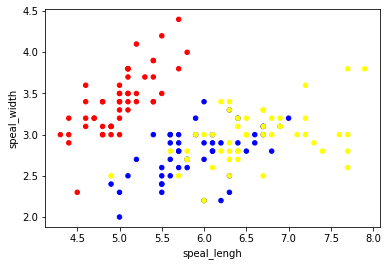

In [17]:
iris.plot.scatter(x=0, y=1, c=colours)
plt.show()

<AxesSubplot:xlabel='speal_lengh', ylabel='speal_width'>

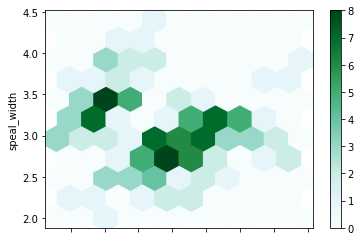

In [18]:
iris.plot.hexbin(x=0, y=1, gridsize=10)

array([[<AxesSubplot:xlabel='speal_lengh', ylabel='speal_lengh'>,
        <AxesSubplot:xlabel='speal_width', ylabel='speal_lengh'>,
        <AxesSubplot:xlabel='petal_length', ylabel='speal_lengh'>,
        <AxesSubplot:xlabel='petal_width', ylabel='speal_lengh'>],
       [<AxesSubplot:xlabel='speal_lengh', ylabel='speal_width'>,
        <AxesSubplot:xlabel='speal_width', ylabel='speal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='speal_width'>,
        <AxesSubplot:xlabel='petal_width', ylabel='speal_width'>],
       [<AxesSubplot:xlabel='speal_lengh', ylabel='petal_length'>,
        <AxesSubplot:xlabel='speal_width', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot:xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot:xlabel='speal_lengh', ylabel='petal_width'>,
        <AxesSubplot:xlabel='speal_width', ylabel='petal_width'>,
        <AxesSubplot:xlabel='petal_length', ylabel='petal_width'>,

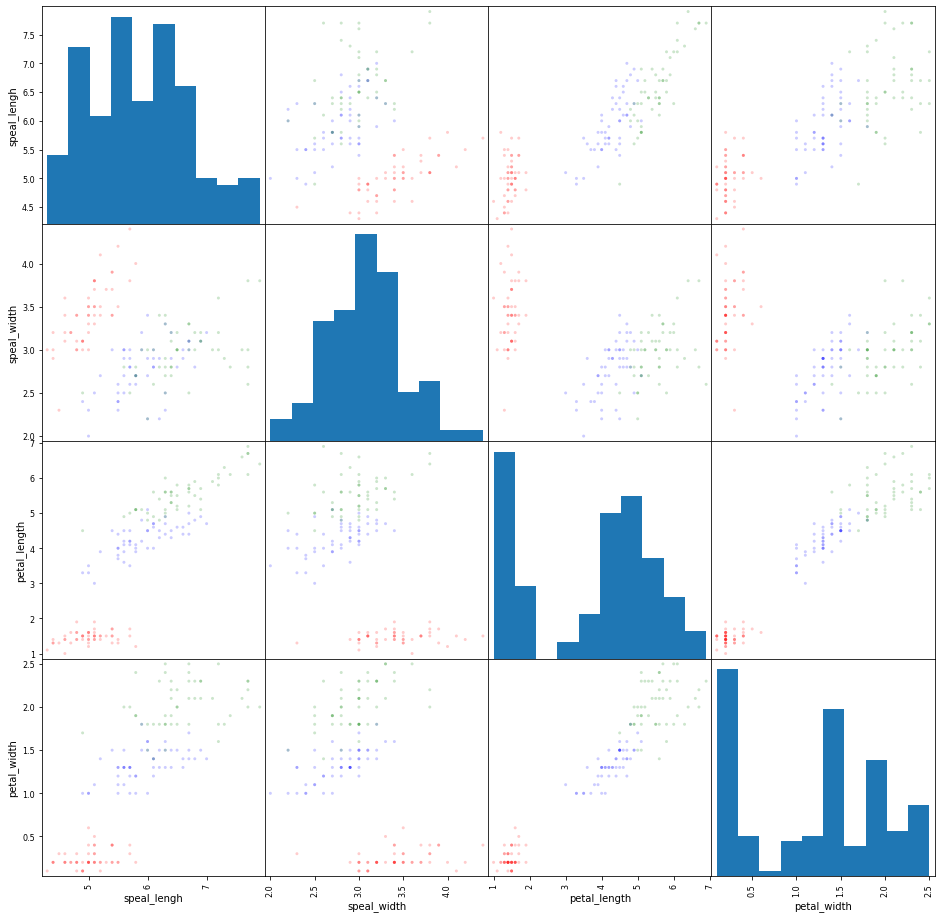

In [22]:
from pandas.plotting import scatter_matrix

scatter_matrix(iris, alpha=0.2, figsize=(16, 16), c=colours, diagonal='hist')